# Q)1 forest_fires :> Problem Statement:
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
## importing linbraaries and dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Collection of data and description

In [3]:
nf=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DATA SCIENCE\\Datasets\\forestfires.csv')

In [4]:
nf

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [5]:
nf.shape

(517, 31)

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
nf1 = nf.copy() 
nf1.drop(nf1.columns[11:30],axis=1,inplace = True)

In [8]:
nf1.shape

(517, 12)

In [9]:
nf1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [10]:
nf1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [11]:
nf1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object

# feature analysis

In [12]:
nf1.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [13]:
nf1.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

# Outliers Check

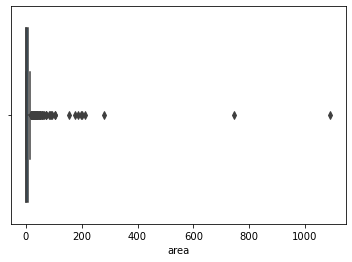

In [14]:
ax = sns.boxplot(nf1['area'])

There are 3 outliers in our data

## Label Encoding

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
nf1.month= label_encoder.fit_transform(nf1.month) 
nf1.day= label_encoder.fit_transform(nf1.day) 
nf1.size_category= label_encoder.fit_transform(nf1.size_category) 



In [18]:
nf1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


## Removing bias in dataset

In [19]:

from imblearn.combine import SMOTETomek
from collections import Counter

In [21]:
resamp = nf1.copy()


#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

Counter({1: 378, 0: 139})


In [22]:
smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b))

Counter({1: 366, 0: 366})


## Neural Network Model Building

In [23]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 3s 17ms/step - loss: 0.6949 - accuracy: 0.4723 - val_loss: 0.6934 - val_accuracy: 0.4379
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5306 - val_loss: 0.6869 - val_accuracy: 0.4852
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5131 - val_loss: 0.6728 - val_accuracy: 0.7160
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6356 - val_loss: 0.6342 - val_accuracy: 0.6923
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.7784 - val_loss: 0.5453 - val_accuracy: 0.7692
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7464 - val_loss: 0.4704 - val_accuracy: 0.7811
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8484 - val_loss: 0.3630 - val_accuracy: 0.8994
Epoch 8/50
35/35 [=

## Model Evaluation

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9682


In [28]:
print(hist.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:

hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.231695,0.932945,0.054371,0.982249,45
46,0.103702,0.967930,0.058797,0.970414,46
47,0.026101,0.991254,0.029452,0.982249,47
48,0.043818,0.985423,0.027242,0.994083,48
49,0.028917,0.988338,0.055805,0.976331,49


## Visualize Training

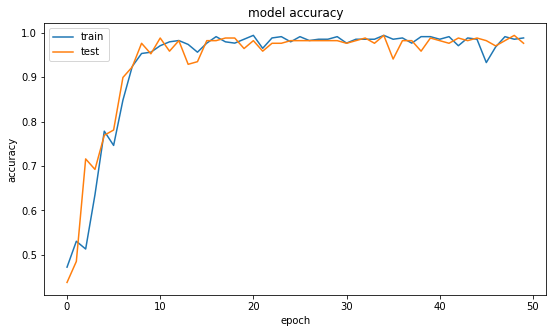

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

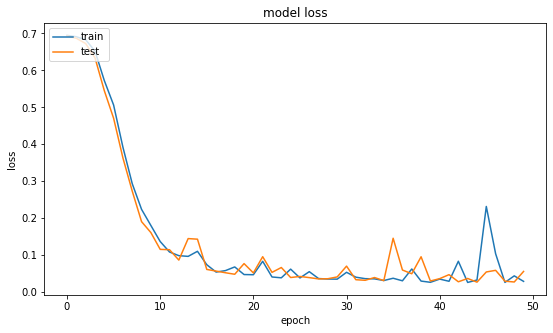

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Hyperparameter tuning

In [32]:
## standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [33]:
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [34]:
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)
#Making training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)

7/7 [==============================] - 0s 4ms/step
[[ 99   6]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.95      1.00      0.97       115

    accuracy                           0.97       220
   macro avg       0.98      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220

